<a href="https://colab.research.google.com/github/jeetshah0303/Artificialintelligence/blob/main/PADLab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#lab3: SVM as a classifier
#part A : using SVM as a classifier for a small dataset with a linear kernel 


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt


In [ ]:
#generating a dataset 
from sklearn.datasets.samples_generator import make_blobs
X,y=make_blobs(n_samples=50,centers=2,random_state=0,cluster_std=0.6)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


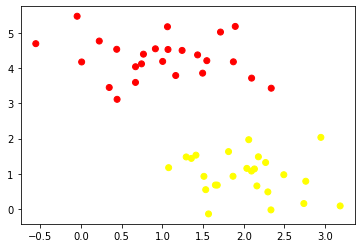

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='autumn')

In [ ]:
xfit=np.linspace(-1,3.5)

In [ ]:
xfit

array([-1.        , -0.90816327, -0.81632653, -0.7244898 , -0.63265306,
       -0.54081633, -0.44897959, -0.35714286, -0.26530612, -0.17346939,
       -0.08163265,  0.01020408,  0.10204082,  0.19387755,  0.28571429,
        0.37755102,  0.46938776,  0.56122449,  0.65306122,  0.74489796,
        0.83673469,  0.92857143,  1.02040816,  1.1122449 ,  1.20408163,
        1.29591837,  1.3877551 ,  1.47959184,  1.57142857,  1.66326531,
        1.75510204,  1.84693878,  1.93877551,  2.03061224,  2.12244898,
        2.21428571,  2.30612245,  2.39795918,  2.48979592,  2.58163265,
        2.67346939,  2.76530612,  2.85714286,  2.94897959,  3.04081633,
        3.13265306,  3.2244898 ,  3.31632653,  3.40816327,  3.5       ])

(-1.0, 3.5)

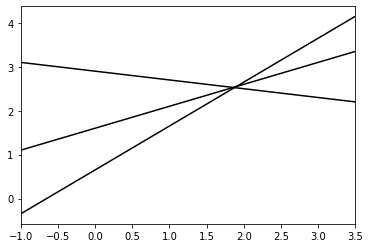

In [ ]:
#plotting lines 
for m,b in [(1,0.65),(0.5,1.6),(-0.2,2.9)]:
  #print(m,b)
  plt.plot(xfit,m*xfit+b,'k')
plt.xlim(-1,3.5)

(-1.0, 3.5)

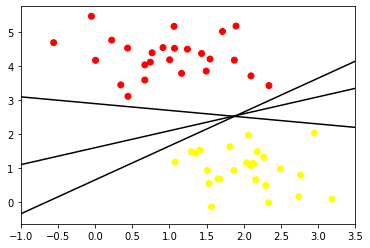

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='autumn')
#plotting lines 
for m,b in [(1,0.65),(0.5,1.6),(-0.2,2.9)]:
  #print(m,b)
  plt.plot(xfit,m*xfit+b,'k')
plt.xlim(-1,3.5)

(-1.0, 3.5)

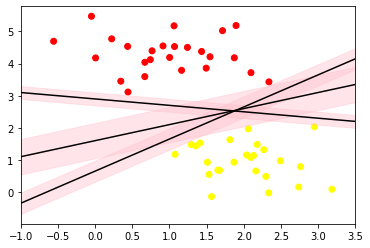

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='autumn')
#plotting lines 
for m,b,d in [(1,0.65,0.33),(0.5,1.6,0.55),(-0.2,2.9,0.2)]:
  #print(m,b)
  yfit=m*xfit+b
  plt.plot(xfit,m*xfit+b,'k')
  plt.fill_between(xfit,yfit-d,yfit+d,edgecolor='none',color='pink',alpha=0.4)
plt.xlim(-1,3.5)

In [ ]:
from sklearn.svm import SVC
model=SVC(kernel='linear', C=1E10)
model.fit(X,y)

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True): 
  if ax is None:
    ax = plt.gca() #gives appropriate axis 
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()
  # Create a grid to evaluate  the model
  x=np.linspace(xlim[0], xlim[1], 30)
  y=np.linspace(ylim[0], ylim[1], 30)
  Y, X = np.meshgrid(y,x) # return coordinate matrices from coordinate vectors
  xy = np.vstack([X.ravel(), Y.ravel()]).T
  P = model.decision_function(xy).reshape(X.shape) # Plot the decision function

  ax.contour(X, Y, P, colors='k', levels=[-1,0,1], alpha=0.5, linestyles =['--', '-', '--'] )

   # Plot the support vectors
  if plot_support: 
    ax.scatter(model.support_vectors_[:,0],
               model.support_vectors_[:,1],
               linewidth=1, facecolors = 'none') 
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

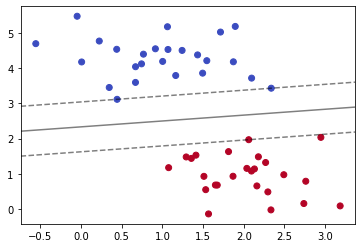

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm') 
plot_svc_decision_function(model)

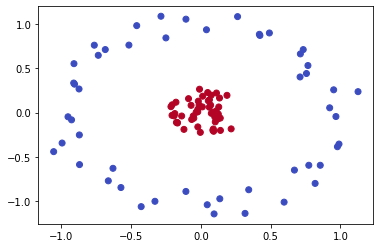

In [ ]:
#NON. LINEAR KERNEL
from sklearn.datasets.samples_generator import make_circles # Nonlinear Dataset
X,y = make_circles(100, factor=.1, noise=.1) 
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')

In [ ]:
clf = SVC(kernel='linear').fit(X,y)

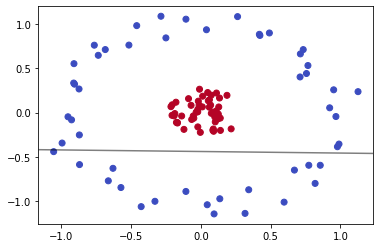

In [ ]:
 plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm') 
 plot_svc_decision_function(clf, plot_support=False)

In [ ]:
clf = SVC(kernel='rbf', C=1E6) 
clf.fit(X,y)

SVC(C=1000000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

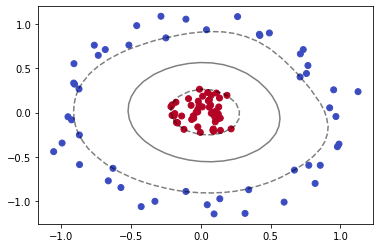

In [ ]:
 plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm') 
 plot_svc_decision_function(clf)